# STOCK/CRPYTO PRICE PREDICTION MODEL

## The following code is an example on how to use simple data analysis tolls in order to set up a simple strategy for long and short term financial trading

### We will make use of the programing language python (3.x) which suits nicely for data anlysis

## --> This a very is simplified model for trading. One should always invest just as much money as one can afford to loose and do own studies in advance. 

## Required modules:
- numpy: the code is designed to be vectorized such that the numpy module can be used and calculations performed fast
- pandas: module for illustrative data frames
- yfinance: api module provided by yahoo finance to get current and previous asset prices
- matplotlib: (sub)module(s) for plots
- scipy: (sub)module for statistical and signal analysis

### CELLS YOU DO NOT NEED TO EXECUTE:

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np

### CELLS YOU CAN EXECUTE OPTIONALLY: 

#### --> This does not toggle the output of a cell:

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

### CELLS YOU NEED TO EXECUTE IN ORDER TO BE UP-TO-DATE:

In [3]:
your_path_to_folder_called_FINANCE = '###INSERT YOUR PATH HERE###'
import sys
sys.path.append(your_path_to_folder_called_FINANCE)

In [4]:
from model import MODEL
import utils, plotting, statistics
import pandas as pd

### CELLS YOU CAN MODIFY:

#### WARNING: Do not mix tickers from different markets/timezones. This can result in various NaN values if a filter is applied!

In [5]:
start_date = '2020-01-01' #your start date for the model.
day_hour = 18 #your intra-day time at which to evaluate the model.
tickers = ['BTC-USD', 'LTC-USD'] #your tickers of interest.

### The main part starts here:

In [6]:
model = MODEL(tickers=tickers)
model.get_data(start=start_date, interval='60m')

[*********************100%***********************]  2 of 2 completed


In [7]:
start_date_range = pd.Timestamp(2020, 1, 1, day_hour)
date_range = utils.create_date_range(start_date=start_date_range)
model.apply_date_filter(date_range)
model.data.tail()

[INFO]: filter applied.


,BTC-USD,LTC-USD
Datetime,,
2020-04-19 18:00:00+01:00,7216.310547,43.112511
2020-04-20 18:00:00+01:00,6949.908691,41.361980
2020-04-21 18:00:00+01:00,6894.629883,41.199726
2020-04-22 18:00:00+01:00,7120.173828,42.149353
2020-04-23 18:00:00+01:00,7464.705078,43.084801


In [8]:
model.eval_model()

|                                  PRICE MODEL                                   |
|                                  Version 0.3                                   |
|                   Authors: Marco Rosenzweig & Patrick Lorenz                   |
----------------------------------------------------------------------------------
|                        ticker = ['BTC-USD', 'LTC-USD']                         |
|                             start date = 01/01/20                              |
|                              end date = 04/23/20                               |
|                      initial investment per ticker = 200                       |
[INIT]: Initialising model for tickers: ['BTC-USD', 'LTC-USD']
[WARNING]: Ignoring second entry of gradient!
[INIT]: Successfully initialized model.
**********************************************************************************
[TICKER]: BTC-USD
[INFO]: Open position.
[INFO]: No tax paid.
[INFO]: Last entry of "Sell Dates" will be

In [9]:
model.ticker_df['BTC-USD']

,Buy Dates,Sell Dates,Buy Prices,Sell Prices,Trade Reward,Trade Win,Trade Efficiency
0,2020-01-10 18:00:00,2020-01-11 18:00:00,8056.407841,8092.316211,200.891424,0.891424,0.004457
1,2020-01-13 18:00:00,2020-01-15 18:00:00,8159.626720,8710.168962,214.445869,13.554445,0.067471
2,2020-01-20 18:00:00,2020-01-22 18:00:00,8703.297439,8635.120274,212.766010,-1.679859,-0.007833
3,2020-01-23 18:00:00,2020-01-30 18:00:00,8372.618587,9450.361622,240.153749,27.387738,0.128722
4,2020-02-04 18:00:00,2020-02-06 18:00:00,9215.028143,9684.722914,252.394510,12.240761,0.050971
5,2020-02-08 18:00:00,2020-02-09 18:00:00,9854.609010,10013.333228,256.459727,4.065217,0.016107
6,2020-02-11 18:00:00,2020-02-12 18:00:00,10167.854639,10278.565529,259.252143,2.792416,0.010888
7,2020-02-16 18:00:00,2020-02-19 18:00:00,9843.817061,10121.483827,266.564927,7.312784,0.028207
8,2020-02-21 18:00:00,2020-02-23 18:00:00,9737.208008,9833.696578,269.206389,2.641462,0.009909
9,2020-02-26 18:00:00,2020-03-03 18:00:00,8823.553376,8684.136919,264.952796,-4.253593,-0.015800


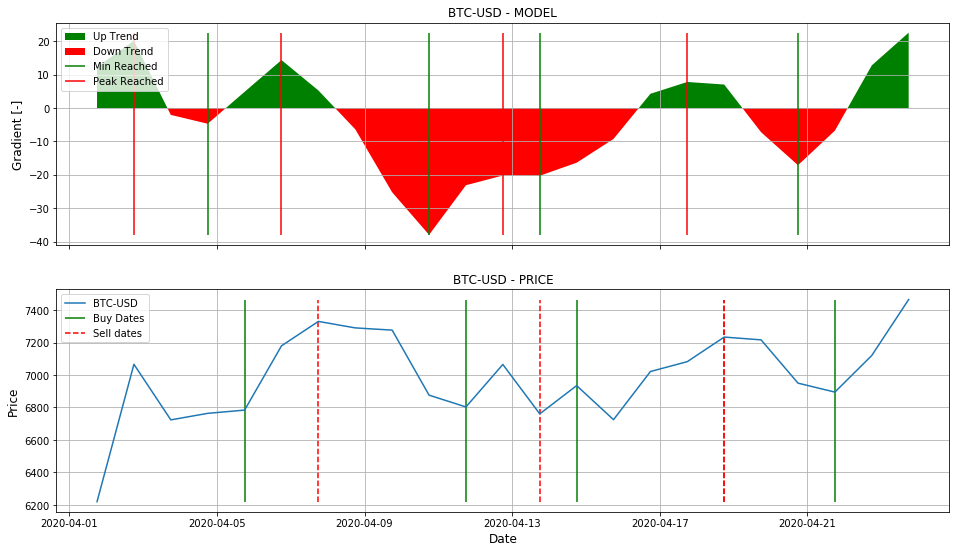

In [10]:
plotting.plot_model(model, tickers='BTC-USD', plot_from_date='2020-04-01')

In [11]:
imag_model = model.copy_model()

In [12]:
imag_model.append_timedelta(timedelta=1)

[INFO]: New data was appended.


In [13]:
imag_model.data.tail(5)

,BTC-USD,LTC-USD
2020-04-20 18:00:00+01:00,6949.908691,41.361980
2020-04-21 18:00:00+01:00,6894.629883,41.199726
2020-04-22 18:00:00+01:00,7120.173828,42.149353
2020-04-23 18:00:00+01:00,7464.705078,43.084801
2020-04-24 18:00:00+01:00,NaN,NaN


In [14]:
imag_model.comp_break_values(tickers='all', parallel_computing=True)

[INFO]: Compute break values with 30.00% deviation
[INFO]: Current ticker: BTC-USD
[INFO]: Using 10 processes.
[INFO]: Current ticker: LTC-USD
[INFO]: Using 10 processes.
[INFO]: Current values: {'BTC-USD': 7464.705078125, 'LTC-USD': 43.084800720214844}
[INFO]: Break values: {'BTC-USD': array([7330.34038672, 7637.88623594]), 'LTC-USD': array([42.57640007, 43.49841481])}
[INFO]: Tolerances: {'BTC-USD': array([-134.36469141,  173.18115781]), 'LTC-USD': array([-0.50840065,  0.41361409])}


In [15]:
imag_model._init_model()
imag_model.data.tail(5)

[INIT]: Initialising model for tickers: ['BTC-USD', 'LTC-USD']
[WARNING]: Ignoring second entry of gradient!
[INIT]: Successfully initialized model.
**********************************************************************************


,BTC-USD,LTC-USD
2020-04-20 18:00:00+01:00,6949.908691,41.361980
2020-04-21 18:00:00+01:00,6894.629883,41.199726
2020-04-22 18:00:00+01:00,7120.173828,42.149353
2020-04-23 18:00:00+01:00,7464.705078,43.084801
2020-04-24 18:00:00+01:00,NaN,NaN


[INFO]: Current ticker: BTC-USD
----------------------------------------------------------------------------------
[INFO]: Result for value: 7238.711131884261
[INFO]: New sell signal was detected for last value: 7238.711131884261.


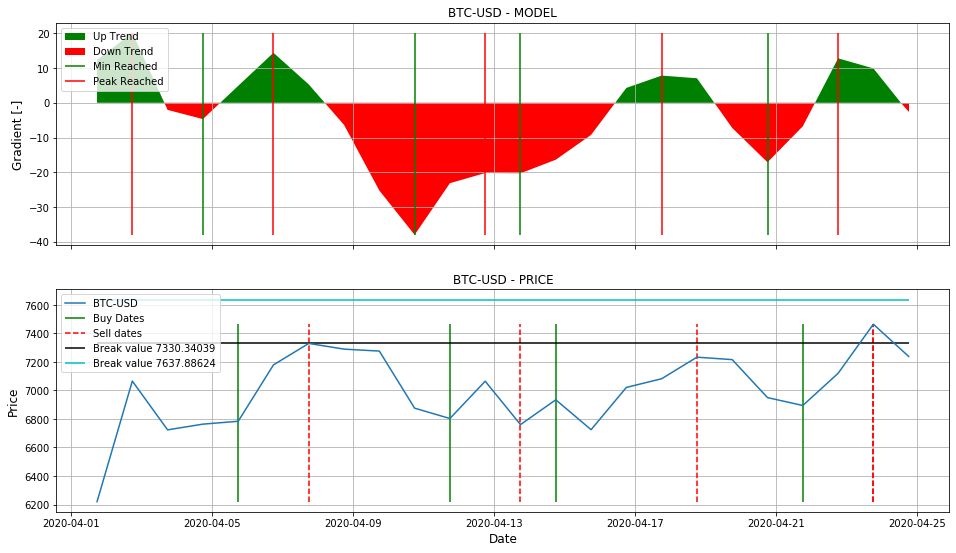

----------------------------------------------------------------------------------
[INFO]: Result for value: 7484.113311327576
[INFO]: New sell signal was detected for last value: 7484.113311327576.


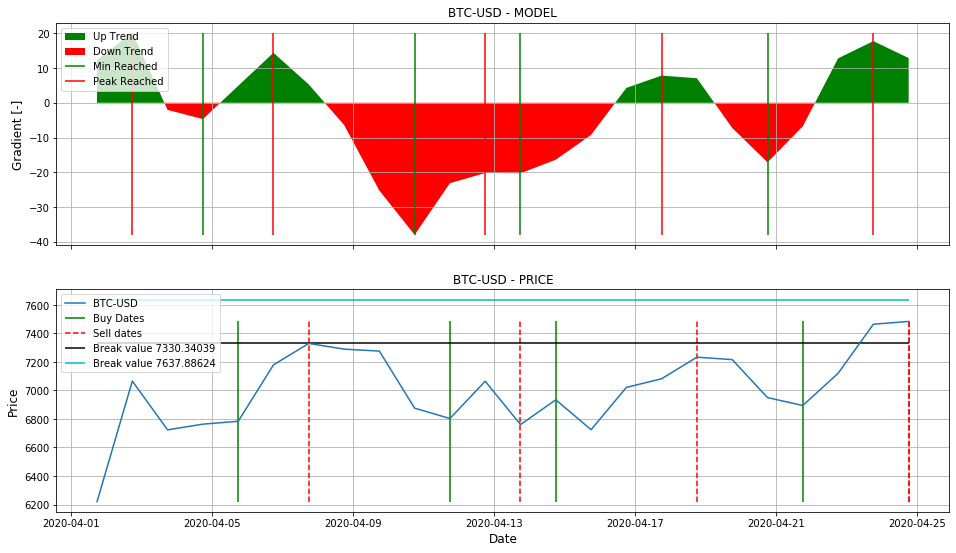

----------------------------------------------------------------------------------
[INFO]: Result for value: 7733.359813886125


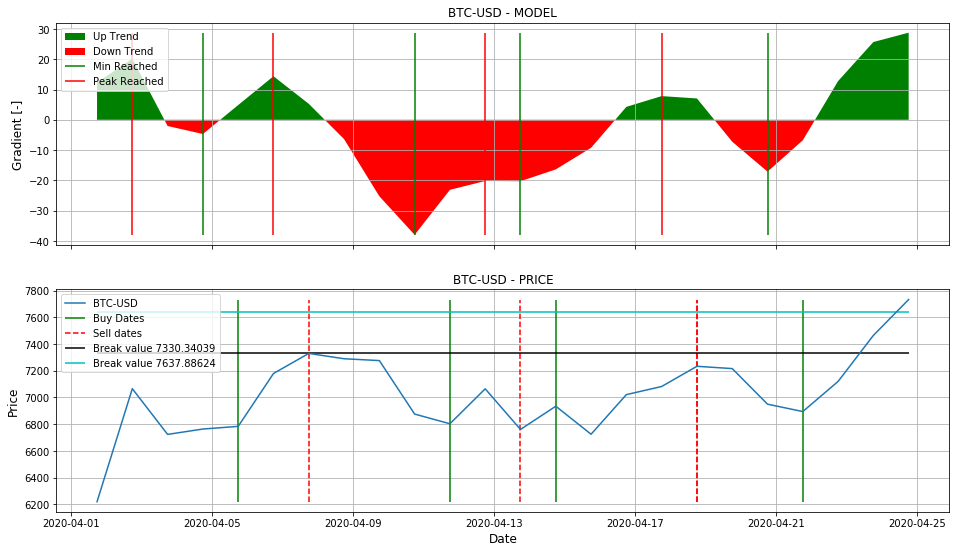

In [16]:
imag_model.show_possibilities(plot_from_date='2020-04-01', switch_axes=False, tickers='BTC-USD')

[INFO]: Current ticker: BTC-USD
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Auto update of tolerances!
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Current value: 7531.84765625!
[STATS-INFO]: New tolerances: [-201.50726953  106.03857969]!
[STATS-EVAL]: Probability for tol=-201.50727: 2.61%
[STATS-EVAL]: Probability for tol=106.03858: 14.11%
[STATS-EVAL]: Probability between: 11.50%


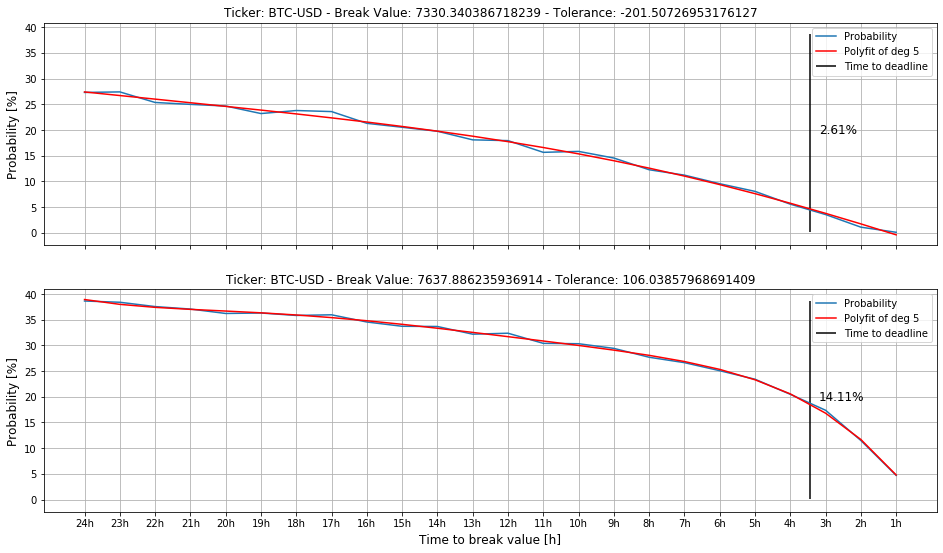

[INFO]: Current ticker: LTC-USD
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Auto update of tolerances!
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Current value: 44.3220100402832!
[STATS-INFO]: New tolerances: [-1.74560997 -0.82359523]!
[STATS-EVAL]: Probability for tol=-1.74561: 6.37%
[STATS-EVAL]: Probability for tol=-0.82360: 22.52%
[STATS-EVAL]: Probability between: 16.15%


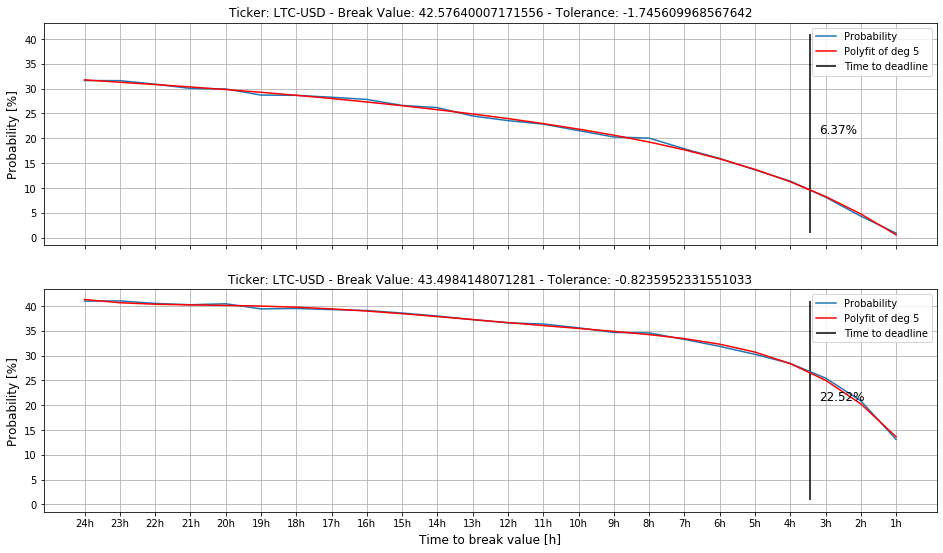

In [17]:
statistics.calc_probs(model=imag_model, tickers='all', auto_update_tolerances=True)